Listing of All Businesses
https://data.lacity.org/Administration-Finance/Listing-of-All-Businesses/r4uk-afju/about_data


In [1]:
import pandas as pd

In [2]:
file_path = 'dataset\\Listing_of_All_Businesses_20250202.csv'
# file_url = 'https://media.githubusercontent.com/media/EricSJSU-DataScience/CS163_project/refs/heads/main/dataset/Listing_of_All_Businesses_20250202.csv'
df = pd.read_csv(file_path, 
                 dtype={"NAICS": "Int64"}, 
                 parse_dates=["LOCATION START DATE", "LOCATION END DATE"]
                 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593026 entries, 0 to 1593025
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   LOCATION ACCOUNT #         1593026 non-null  object        
 1   BUSINESS NAME              1593026 non-null  object        
 2   DBA NAME                   245872 non-null   object        
 3   STREET ADDRESS             1592924 non-null  object        
 4   CITY                       1592920 non-null  object        
 5   ZIP CODE                   1593026 non-null  object        
 6   LOCATION DESCRIPTION       1592903 non-null  object        
 7   MAILING ADDRESS            359466 non-null   object        
 8   MAILING CITY               359478 non-null   object        
 9   MAILING ZIP CODE           359344 non-null   object        
 10  NAICS                      624448 non-null   Int64         
 11  PRIMARY NAICS DESCRIPTION  624448 non

In [6]:
df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce', infer_datetime_format=True)
df.info()

C:\Users\Eric\AppData\Local\Temp\ipykernel_26440\926956247.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['LOCATION END DATE'] = pd.to_datetime(df['LOCATION END DATE'], errors='coerce', infer_datetime_format=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593026 entries, 0 to 1593025
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   LOCATION ACCOUNT #         1593026 non-null  object        
 1   BUSINESS NAME              1593026 non-null  object        
 2   DBA NAME                   245872 non-null   object        
 3   STREET ADDRESS             1592924 non-null  object        
 4   CITY                       1592920 non-null  object        
 5   ZIP CODE                   1593026 non-null  object        
 6   LOCATION DESCRIPTION       1592903 non-null  object        
 7   MAILING ADDRESS            359466 non-null   object        
 8   MAILING CITY               359478 non-null   object        
 9   MAILING ZIP CODE           359344 non-null   object        
 10  NAICS                      624448 non-null   Int64         
 11  PRIMARY NAICS DESCRIPTION  624448 non

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593026 entries, 0 to 1593025
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   LOCATION ACCOUNT #         1593026 non-null  object        
 1   BUSINESS NAME              1593026 non-null  object        
 2   DBA NAME                   245872 non-null   object        
 3   STREET ADDRESS             1592924 non-null  object        
 4   CITY                       1592920 non-null  object        
 5   ZIP CODE                   1593026 non-null  object        
 6   LOCATION DESCRIPTION       1592903 non-null  object        
 7   MAILING ADDRESS            359466 non-null   object        
 8   MAILING CITY               359478 non-null   object        
 9   MAILING ZIP CODE           359344 non-null   object        
 10  NAICS                      624448 non-null   Int64         
 11  PRIMARY NAICS DESCRIPTION  624448 non

In [7]:
# drop na NAICS and na Start date
df1 = df.dropna(subset=['NAICS', 'LOCATION START DATE'])

C:\Users\Eric\AppData\Local\Temp\ipykernel_26440\1167118112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['LOCATION START DATE'].dt.year


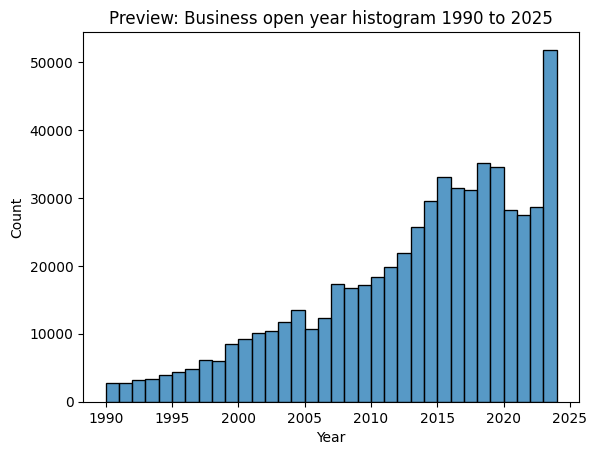

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
year_start, year_end = 1990, df1["Year"].max()
df1['Year'] = df1['LOCATION START DATE'].dt.year
plot1 = sns.histplot(df1['Year'], bins=range(year_start, year_end), kde=False)
plot1 = plt.title(f'Preview: Business open year histogram {year_start} to {year_end}')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624379 entries, 0 to 1593025
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LOCATION ACCOUNT #         624379 non-null  object        
 1   BUSINESS NAME              624379 non-null  object        
 2   DBA NAME                   209427 non-null  object        
 3   STREET ADDRESS             624375 non-null  object        
 4   CITY                       624332 non-null  object        
 5   ZIP CODE                   624379 non-null  object        
 6   LOCATION DESCRIPTION       624361 non-null  object        
 7   MAILING ADDRESS            297306 non-null  object        
 8   MAILING CITY               297315 non-null  object        
 9   MAILING ZIP CODE           297208 non-null  object        
 10  NAICS                      624379 non-null  Int64         
 11  PRIMARY NAICS DESCRIPTION  624379 non-null  object      

#### NAICS info

In [13]:
file_path = 'dataset\\naics_2_clean.csv'
naics_2 = pd.read_csv(file_path)

In [14]:
naics_dict = naics_2.set_index('Code')['Sector_Title'].to_dict()

In [15]:
df1['NAICS_2'] = df1['NAICS'].astype(str).str[:2].astype(int)
df1['2d_title'] = df1['NAICS_2'].map(naics_dict)

C:\Users\fredk\AppData\Local\Temp\ipykernel_12492\1311135580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NAICS_2'] = df1['NAICS'].astype(str).str[:2].astype(int)
C:\Users\fredk\AppData\Local\Temp\ipykernel_12492\1311135580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['2d_title'] = df1['NAICS_2'].map(naics_dict)


### GeoGraph

In [42]:
import folium
import geopy
import pandas as pd
import numpy as np
from folium.plugins import MarkerCluster

In [24]:
city_count_dict = df1['CITY'].value_counts().to_dict()
print(city_count_dict)
print(len(city_count_dict))

{'LOS ANGELES': 304131, 'VAN NUYS': 22623, 'NORTH HOLLYWOOD': 18613, 'SHERMAN OAKS': 16167, 'WOODLAND HILLS': 14213, 'ENCINO': 11462, 'NORTHRIDGE': 10279, 'STUDIO CITY': 7796, 'CANOGA PARK': 7792, 'RESEDA': 7390, 'TARZANA': 7181, 'CHATSWORTH': 6407, 'SAN PEDRO': 6273, 'SUN VALLEY': 6056, 'VENICE': 5864, 'SYLMAR': 5850, 'PANORAMA CITY': 5801, 'GRANADA HILLS': 5651, 'PACOIMA': 4737, 'NORTH HILLS': 4329, 'GLENDALE': 4178, 'VALLEY VILLAGE': 4176, 'WEST HILLS': 4143, 'WINNETKA': 3670, 'BEVERLY HILLS': 3628, 'N HOLLYWOOD': 3620, 'WILMINGTON': 3590, 'BURBANK': 3480, 'TORRANCE': 3175, 'MARINA DEL REY': 3124, 'PACIFIC PALISADES': 3093, 'SANTA MONICA': 3049, 'WEST HOLLYWOOD': 2762, 'CULVER CITY': 2681, 'ARLETA': 2634, 'TUJUNGA': 2626, 'GARDENA': 2535, 'LONG BEACH': 2329, 'INGLEWOOD': 1998, 'PASADENA': 1956, 'SUNLAND': 1895, 'MISSION HILLS': 1862, 'PORTER RANCH': 1857, 'HARBOR CITY': 1600, 'SAN FERNANDO': 1499, 'PLAYA DEL REY': 1464, 'PALMDALE': 1427, 'TOLUCA LAKE': 1319, 'SIMI VALLEY': 1273, 'CA

Load city_list dataset

In [31]:
file_path = 'dataset\\city_list.csv'
city_df = pd.read_csv(file_path)
city_list = city_df['City'].to_list()

In [32]:
# for later Geomap use
city_dict = {'City': city_list}

In [37]:
# Function to parse coordinates
def parse_location(location_str):
    try:
        lat, lon = location_str.strip('()').split(', ')
        return float(lat), float(lon)
    except:
        return None, None

In [43]:
# Extract latitude and longitude
df1[['latitude', 'longitude']] = df1['LOCATION'].apply(lambda x: pd.Series(parse_location(x)))

In [40]:
# Filter invalid coordinates
df1 = df1.dropna(subset=['latitude', 'longitude'])
df1 = df1[(df1['latitude'].between(-90, 90)) & (df1['longitude'].between(-180, 180))]

In [ ]:
# Calculate map center
map_center = [df1['latitude'].mean(), df1['longitude'].mean()]

# Initialize the map
business_map = folium.Map(location=map_center, zoom_start=12)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(business_map)

# Add business markers
for _, row in df1.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(f"{row['BUSINESS NAME']}<br>{row['STREET ADDRESS']}", max_width=250),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
business_map

In [46]:
import folium
import pandas as pd
import numpy as np
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# Load the business dataset from the CSV file
df_business = df1.copy()

# Assume the CSV has these columns: 'Business', 'Address', 'City', 'State'
# Create a full address column for geocoding
df_business['Full_Address'] = df_business['Address'] + ", " + df_business['City'] + ", " + df_business['State']

# Optionally include ZIP if available
if 'Zip' in df_business.columns:
    df_business['Full_Address'] = df_business['Full_Address'] + ", " + df_business['Zip'].astype(str)

# Define a function to fetch geocode data using Nominatim
def findGeocode(address):
    try:
        geolocator = Nominatim(user_agent="business_map")
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return None

# Initialize lists to store latitude and longitude values
latitudes = []
longitudes = []

# For each full address, get the coordinates
for address in df_business['Full_Address']:
    location = findGeocode(address)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(np.nan)
        longitudes.append(np.nan)

# Append the coordinates to the DataFrame
df_business['Latitude'] = latitudes
df_business['Longitude'] = longitudes

# Calculate a center for the map (using the mean of the coordinates)
map_center = [df_business['Latitude'].mean(), df_business['Longitude'].mean()]

# Create a Folium map centered at the calculated center
business_map = folium.Map(location=map_center, zoom_start=12)

# Loop through the DataFrame and add a marker for each business
for idx, row in df_business.iterrows():
    if not np.isnan(row['Latitude']) and not np.isnan(row['Longitude']):
         folium.Marker(
             location=[row['Latitude'], row['Longitude']],
             popup=f"{row['Business']}<br>{row['Full_Address']}"
         ).add_to(business_map)

# Display the map
business_map

KeyError: 'Address'

#### To-Do:
Visualization:

Botplot: different induastry vs survivual time

Location: geo graph + (la zoning map or population density map)

survival time by different business (naics code) (similar to histogram)


Note: finalize presentation need to show simple EDA idaes
